In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import glob
import os
import seaborn as sns
from pylab import *
import math
from IPython.display import Image
from IPython.display import display
from __future__ import print_function
from PIL import Image
import numpy as np
from matplotlib.mlab import PCA

In [2]:
os.chdir(r'O:\ImStor\sorger\data\Cytell\Kyun\cycIF_analysis_python_v3_log\All_summary')

In [3]:
# read AP scores and AE scores

APdf = pd.read_csv('O:\ImStor\sorger\data\Cytell\Kyun\cycIF_analysis_python_v3_log\All_summary\APscore_Pop2Pop34\APdf.csv')
ACdf = pd.read_csv('O:\ImStor\sorger\data\Cytell\Kyun\cycIF_analysis_python_v3_log\All_summary\ACscore_Pop1Pop26\ACdf.csv')

# add 'AP' or 'AE' to the antibody names

##APnames = list(APdf.columns)
##ACnames = list(ACdf.columns)

ACnames = ['Treatment', 'pAkt_N', 'pAkt_C', 'pHis3_N', 'pHis3_C', 'bCat_N',
        'bCat_C', 'NFkB_N', 'NFkB_C', 'Ecad_N', 'Ecad_C', 'pErk_N', 'pErk_C',
        'pS6-235_N', 'pS6-235_C', 'pRB_N', 'pRB_C', 'Ki67_N', 'Ki67_C',
        'pStat3_N', 'pStat3_C', 'pS6-240_N', 'pS6-240_C', 'pAurk_N', 'pAurk_C',
        'Foxo3a_N', 'Foxo3a_C', 'pSmad1/5_N', 'pSmad1/5_C', 'pSmad2/3_N',
        'pSmad2/3_C', 'Vimentin_N', 'Vimentin_C', 'pJNK_N', 'pJNK_C', 'pp38_N',
        'pp38_C', 'cMyc_N', 'cMyc_C', 'p21_N', 'p21_C', 'cJun_N', 'cJun_C',
        'Yap_N', 'Yap_C', 'aNotch1_N', 'aNotch1_C', 'pSrc_N', 'pSrc_C', 'p27_N',
        'p27_C', 'ERa_N', 'ERa_C', 'CyclinD1_N', 'CyclinD1_C', 'CellLine',
        'Treatment.1', 'Time']
APnames = ['Treatment', 'pAkt_N', 'pAkt_C', 'pHis3_N', 'pHis3_C', 'bCat_N',
        'bCat_C', 'NFkB_N', 'NFkB_C', 'Ecad_N', 'Ecad_C', 'pErk_N', 'pErk_C',
        'pS6-235_N', 'pS6-235_C', 'pRB_N', 'pRB_C', 'Ki67_N', 'Ki67_C',
        'pStat3_N', 'pStat3_C', 'pS6-240_N', 'pS6-240_C', 'pAurk_N', 'pAurk_C',
        'Foxo3a_N', 'Foxo3a_C', 'pSmad1/5_N', 'pSmad1/5_C', 'pSmad2/3_N',
        'pSmad2/3_C', 'Vimentin_N', 'Vimentin_C', 'pJNK_N', 'pJNK_C', 'pp38_N',
        'pp38_C', 'cMyc_N', 'cMyc_C', 'p21_N', 'p21_C', 'cJun_N', 'cJun_C',
        'Yap_N', 'Yap_C', 'aNotch1_N', 'aNotch1_C', 'pSrc_N', 'pSrc_C', 'p27_N',
        'p27_C', 'ERa_N', 'ERa_C', 'CyclinD1_N', 'CyclinD1_C', 'CellLine',
        'Treatment.1', 'Time']

ACnames = ["AE:" + name for name in ACnames]
APnames = ["AP:" + name for name in APnames]

# renames the column labeling
APdf.columns = APnames
ACdf.columns = ACnames

# concatenate AP and AE dataframes ands save it to cvs file
APACdf = pd.concat([APdf, ACdf], axis=1)
APACdf.to_csv('AP_AC_Pop1Pop26.csv')

In [4]:
# read APAEall.csv file
APACdf = pd.read_csv('AP_AC_Pop1Pop26.csv')

# make a new dataframe (df1) with selected columns
df1 = APACdf[['AP:Treatment', 'AP:pAkt_N', 'AP:pAkt_C', 'AP:pHis3_N', 'AP:pHis3_C', 'AP:bCat_N', 'AP:bCat_C', 'AP:NFkB_N',
 'AP:NFkB_C', 'AP:Ecad_N', 'AP:Ecad_C', 'AP:pErk_N', 'AP:pErk_C', 'AP:pS6-235_N', 'AP:pS6-235_C', 'AP:pRB_N', 'AP:pRB_C',
 'AP:Ki67_N', 'AP:Ki67_C', 'AP:pStat3_N', 'AP:pStat3_C', 'AP:pS6-240_N', 'AP:pS6-240_C', 'AP:pAurk_N', 'AP:pAurk_C',
 'AP:Foxo3a_N', 'AP:Foxo3a_C', 'AP:pSmad1/5_N', 'AP:pSmad1/5_C', 'AP:pSmad2/3_N', 'AP:pSmad2/3_C', 'AP:Vimentin_N',
 'AP:Vimentin_C', 'AP:pJNK_N', 'AP:pJNK_C', 'AP:pp38_N', 'AP:pp38_C', 'AP:cMyc_N', 'AP:cMyc_C', 'AP:p21_N', 'AP:p21_C',
 'AP:cJun_N', 'AP:cJun_C', 'AP:Yap_N', 'AP:Yap_C', 'AP:aNotch1_N', 'AP:aNotch1_C', 'AP:pSrc_N', 'AP:pSrc_C', 'AP:p27_N',
 'AP:p27_C', 'AP:ERa_N', 'AP:ERa_C', 'AP:CyclinD1_N', 'AP:CyclinD1_C',               
              'AP:CellLine',  'AP:Time',
 
 'AE:pAkt_N', 'AE:pAkt_C', 'AE:pHis3_N', 'AE:pHis3_C', 'AE:bCat_N', 'AE:bCat_C', 'AE:NFkB_N', 'AE:NFkB_C', 'AE:Ecad_N',
 'AE:Ecad_C', 'AE:pErk_N', 'AE:pErk_C', 'AE:pS6-235_N', 'AE:pS6-235_C', 'AE:pRB_N', 'AE:pRB_C', 'AE:Ki67_N', 'AE:Ki67_C',
 'AE:pStat3_N', 'AE:pStat3_C', 'AE:pS6-240_N', 'AE:pS6-240_C', 'AE:pAurk_N', 'AE:pAurk_C', 'AE:Foxo3a_N', 'AE:Foxo3a_C',
 'AE:pSmad1/5_N', 'AE:pSmad1/5_C', 'AE:pSmad2/3_N', 'AE:pSmad2/3_C', 'AE:Vimentin_N', 'AE:Vimentin_C', 'AE:pJNK_N',
 'AE:pJNK_C', 'AE:pp38_N', 'AE:pp38_C', 'AE:cMyc_N', 'AE:cMyc_C', 'AE:p21_N', 'AE:p21_C', 'AE:cJun_N', 'AE:cJun_C',
 'AE:Yap_N', 'AE:Yap_C', 'AE:aNotch1_N', 'AE:aNotch1_C', 'AE:pSrc_N', 'AE:pSrc_C', 'AE:p27_N', 'AE:p27_C', 'AE:ERa_N',
 'AE:ERa_C', 'AE:CyclinD1_N', 'AE:CyclinD1_C',
              'AE:CellLine', 'AE:Treatment'
 ]]

In [5]:
#df1.head()
#df1[df1['AP:CellLine'] == 'BT483']

# make ID column by combining CellLine and Treatment
df1['ID'] = df1['AP:CellLine'] + ':' + df1['AP:Treatment']

# name index with ID column
df1.set_index(df1['ID'])

C:\Users\sl456\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,AP:Treatment,AP:pAkt_N,AP:pAkt_C,AP:pHis3_N,AP:pHis3_C,AP:bCat_N,AP:bCat_C,AP:NFkB_N,AP:NFkB_C,AP:Ecad_N,...,AE:pSrc_C,AE:p27_N,AE:p27_C,AE:ERa_N,AE:ERa_C,AE:CyclinD1_N,AE:CyclinD1_C,AE:CellLine,AE:Treatment,ID
ID,,,,,,,,,,,,,,,,,,,,,
BT483:DMSO,DMSO,-0.214834,-0.170539,1.046674,0.928949,0.316720,0.381623,0.458199,0.577573,0.280474,...,0.904578,0.120404,0.404519,1.031561,0.908968,0.526457,0.983867,BT483,DMSO,BT483:DMSO
MCF7:DMSO,DMSO,0.978139,1.046262,0.298403,0.303955,0.465090,0.461121,0.142809,0.106951,0.117667,...,0.627596,0.451674,0.384557,1.257350,0.895635,-0.915435,-0.442058,MCF7,DMSO,MCF7:DMSO
T47D:DMSO,DMSO,1.091835,1.005695,0.709845,0.504815,0.813423,0.896709,0.159749,0.159762,0.234851,...,1.286727,0.454893,1.583316,1.211914,1.251133,0.532400,1.332255,T47D,DMSO,T47D:DMSO
EFM19:DMSO,DMSO,0.528187,0.516870,1.009318,0.850521,-0.183729,-0.120643,0.271636,0.398048,-0.237876,...,1.680379,1.274369,1.766518,1.668427,1.958113,0.330364,0.816346,EFM19,DMSO,EFM19:DMSO
BT483:BYL0.03,BYL0.03,-0.704201,-0.655903,1.010128,0.748388,0.179951,0.274526,0.339981,0.461877,0.092532,...,2.054464,0.556410,1.471399,1.869449,2.080546,1.067994,2.050740,BT483,BYL0.03,BT483:BYL0.03
MCF7:BYL0.03,BYL0.03,0.802689,0.767651,0.455711,0.304260,0.362483,0.325251,0.146916,0.108141,0.129370,...,0.809714,0.329248,0.547378,1.060062,0.941326,-0.842091,-0.163395,MCF7,BYL0.03,MCF7:BYL0.03
T47D:BYL0.03,BYL0.03,1.075206,1.061580,1.244216,0.913929,0.740079,0.968510,1.104545,1.113618,0.810454,...,1.300410,0.177627,0.807339,1.015606,0.863384,1.006951,1.892591,T47D,BYL0.03,T47D:BYL0.03
EFM19:BYL0.03,BYL0.03,0.447723,0.451695,0.801915,0.358050,-0.123367,-0.069546,0.270489,0.376623,-0.237048,...,1.808212,1.402725,1.727713,1.646963,1.982135,0.999166,1.712369,EFM19,BYL0.03,EFM19:BYL0.03
BT483:F+BYL0.03,F+BYL0.03,-0.214149,-0.254185,1.098303,0.984871,0.561066,0.689404,0.689607,0.799515,0.521877,...,1.913565,0.652874,1.485323,1.924189,1.907150,1.358183,2.172222,BT483,F+BYL0.03,BT483:F+BYL0.03


# Let's make dataframe (df2) for heatmap

In [6]:
# df2 with selected columns from df1
df2 = df1[['AP:pAkt_N', 'AP:pAkt_C', 'AP:pHis3_N', 'AP:pHis3_C', 'AP:bCat_N', 'AP:bCat_C', 'AP:NFkB_N', 'AP:NFkB_C',
 'AP:Ecad_N', 'AP:Ecad_C', 'AP:pErk_N', 'AP:pErk_C', 'AP:pS6-235_N', 'AP:pS6-235_C', 'AP:pRB_N', 'AP:pRB_C', 'AP:Ki67_N',
 'AP:Ki67_C', 'AP:pStat3_N', 'AP:pStat3_C', 'AP:pS6-240_N', 'AP:pS6-240_C', 'AP:pAurk_N', 'AP:pAurk_C', 'AP:Foxo3a_N',
 'AP:Foxo3a_C', 'AP:pSmad1/5_N', 'AP:pSmad1/5_C', 'AP:pSmad2/3_N', 'AP:pSmad2/3_C', 'AP:Vimentin_N', 'AP:Vimentin_C',
 'AP:pJNK_N', 'AP:pJNK_C', 'AP:pp38_N', 'AP:pp38_C', 'AP:cMyc_N', 'AP:cMyc_C', 'AP:p21_N', 'AP:p21_C', 'AP:cJun_N', 'AP:cJun_C',
 'AP:Yap_N', 'AP:Yap_C', 'AP:aNotch1_N', 'AP:aNotch1_C', 'AP:pSrc_N', 'AP:pSrc_C', 'AP:p27_N', 'AP:p27_C', 'AP:ERa_N',
 'AP:ERa_C', 'AP:CyclinD1_N', 'AP:CyclinD1_C', 
 
 'AE:pAkt_N', 'AE:pAkt_C', 'AE:pHis3_N', 'AE:pHis3_C', 'AE:bCat_N', 'AE:bCat_C',
 'AE:NFkB_N', 'AE:NFkB_C', 'AE:Ecad_N', 'AE:Ecad_C', 'AE:pErk_N', 'AE:pErk_C', 'AE:pS6-235_N', 'AE:pS6-235_C', 'AE:pRB_N',
 'AE:pRB_C', 'AE:Ki67_N', 'AE:Ki67_C', 'AE:pStat3_N', 'AE:pStat3_C', 'AE:pS6-240_N', 'AE:pS6-240_C', 'AE:pAurk_N', 'AE:pAurk_C',
 'AE:Foxo3a_N', 'AE:Foxo3a_C', 'AE:pSmad1/5_N', 'AE:pSmad1/5_C', 'AE:pSmad2/3_N', 'AE:pSmad2/3_C', 'AE:Vimentin_N',
 'AE:Vimentin_C', 'AE:pJNK_N', 'AE:pJNK_C', 'AE:pp38_N', 'AE:pp38_C', 'AE:cMyc_N', 'AE:cMyc_C', 'AE:p21_N', 'AE:p21_C',
 'AE:cJun_N', 'AE:cJun_C', 'AE:Yap_N', 'AE:Yap_C', 'AE:aNotch1_N', 'AE:aNotch1_C', 'AE:pSrc_N', 'AE:pSrc_C', 'AE:p27_N',
 'AE:p27_C', 'AE:ERa_N', 'AE:ERa_C', 'AE:CyclinD1_N', 'AE:CyclinD1_C',
           'AE:CellLine',        'AE:Treatment',         'ID']]

# rename index of df2 with ID column and remove ID column
df2 = df2.set_index(df2['ID'])
df2 = df2.drop(['ID'], axis=1)

# make heatmap and PCA

In [7]:
import seaborn as sns; sns.set(color_codes=True)

In [9]:
plt.style.use('classic')
plt.rcParams['figure.facecolor'] = '1'

In [10]:
# make new label, by removing 'AP:' and etc
oldLabel = list(df2.columns)

newLabel = [s.replace('AP:', '') for s in oldLabel]
newLabel = [s.replace('AE:', '') for s in newLabel]
newLabel = [s.replace('_N', '') for s in newLabel]

df2.columns = newLabel

# exclude F+BYL3 data (too little cell numbers to analyze)
df3 = df2.drop(['BT483:Tram', 'MCF7:Tram', 'T47D:Tram', 'EFM19:Tram', 'BT483:F+BYL3', 'MCF7:F+BYL3', 'T47D:F+BYL3', 'EFM19:F+BYL3'])

In [11]:
df3['CellLine'].unique()

array(['BT483', 'MCF7', 'T47D', 'EFM19'], dtype=object)

# APscore - by cell line

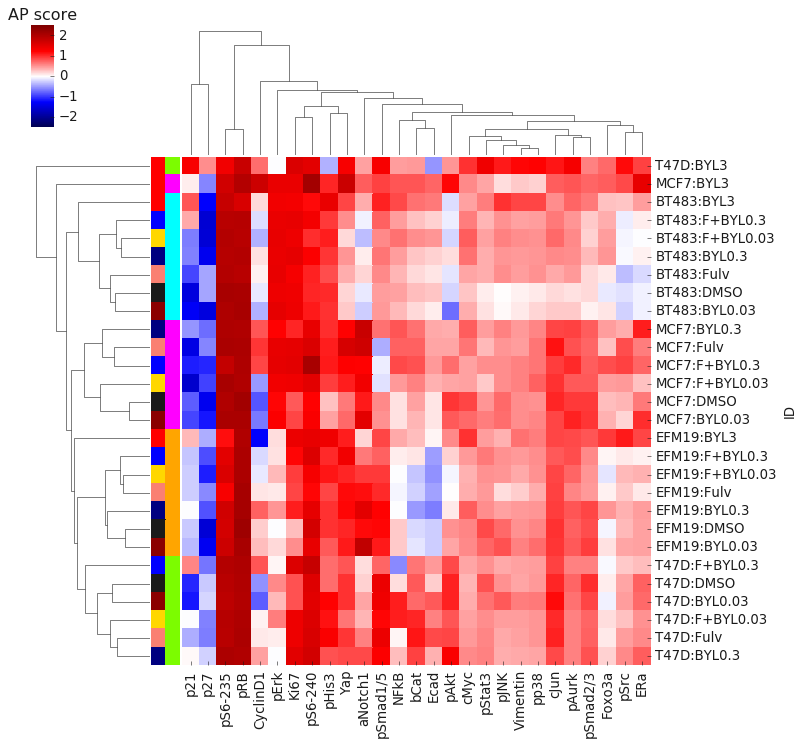

In [12]:
# APscore heatmap
## range(0,54):AP, range(54:108):AC
## use df3, this does not contain F+BYL3

Cell = dict(zip(df3['CellLine'].unique(), ['cyan', 'magenta', 'lawngreen', 'orange']))
Cell2 = dict(zip(df3['Treatment'].unique(), ['k', 'darkred', 'gold', 'salmon', 'navy', 'blue', 'red', 'snow']))
row_colors = df3['CellLine'].map(Cell)
row_colors2 = df3['Treatment'].map(Cell2)

g = sns.clustermap(df3.iloc[:,range(0,54,2)], row_colors=[row_colors2, row_colors], cmap="seismic", vmin=-2.5, vmax=2.5) #,row_cluster=False 

plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.title('AP score')

plt.show()

In [13]:
DF = df3.iloc[:,range(0,54,2)]

DF['CellLine'] = df3.loc[:, 'CellLine']
DF['Treatment'] = df3.loc[:, 'Treatment']

DF.columns

C:\Users\sl456\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sl456\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Index(['pAkt', 'pHis3', 'bCat', 'NFkB', 'Ecad', 'pErk', 'pS6-235', 'pRB',
       'Ki67', 'pStat3', 'pS6-240', 'pAurk', 'Foxo3a', 'pSmad1/5', 'pSmad2/3',
       'Vimentin', 'pJNK', 'pp38', 'cMyc', 'p21', 'cJun', 'Yap', 'aNotch1',
       'pSrc', 'p27', 'ERa', 'CyclinD1', 'CellLine', 'Treatment'],
      dtype='object')

In [14]:
from sklearn.preprocessing import StandardScaler
features = ['pAkt', 'pHis3', 'bCat', 'NFkB', 'Ecad', 'pErk', 'pS6-235', 'pRB',
       'Ki67', 'pStat3', 'pS6-240', 'pAurk', 'Foxo3a', 'pSmad1/5', 'pSmad2/3',
       'Vimentin', 'pJNK', 'pp38', 'cMyc', 'p21', 'cJun', 'Yap', 'aNotch1',
       'pSrc', 'p27', 'ERa', 'CyclinD1']

# Separating out the features
x = DF.loc[:, features].values

# Separating out the target
y = DF.loc[:,['CellLine']].values

# Standardizing the features
#x = StandardScaler().fit_transform(x)
x = x

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 
                          'principal component 3', 'principal component 4', 
                          'principal component 5', 'principal component 6', 
                          'principal component 7', 'principal component 8', 
                          'principal component 9', 'principal components 10' ])

principalDf.index = DF.index

finalDf = pd.concat([principalDf, DF[['CellLine']]], axis = 1)

eigenvalues = pca.explained_variance_

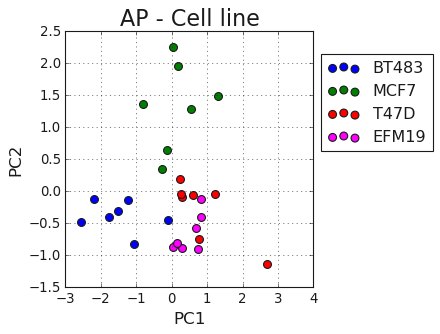

In [45]:
fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot(1,1,1) 

targets = ['BT483', 'MCF7', 'T47D', 'EFM19']
colors = ['blue', 'green', 'red', 'magenta']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['CellLine'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets, loc='lower left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('AP - Cell line', fontsize = 20)
ax.grid()

plt.show()

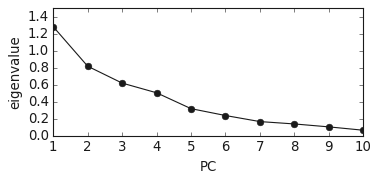

In [47]:
# eigenvalue
fig = plt.figure(figsize = (5,2))
ax = fig.add_subplot(1,1,1) 

ax.plot(range(1,11), eigenvalues, marker='o', c='k')

plt.ylabel('eigenvalue')
plt.xlabel('PC')
plt.ylim([0, 1.5])
#plt.xlim([])

plt.show()

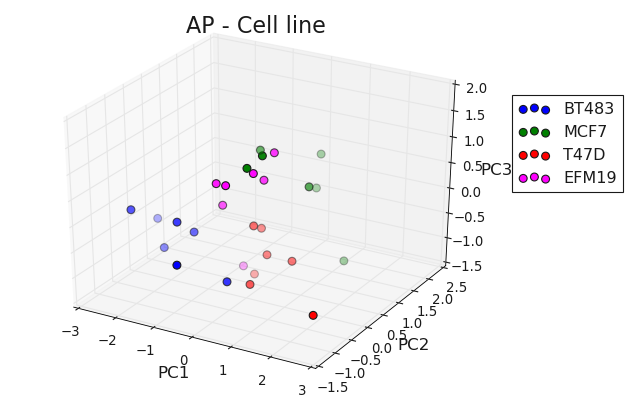

In [48]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

targets = ['BT483', 'MCF7', 'T47D', 'EFM19']
colors = ['blue', 'green', 'red', 'magenta']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['CellLine'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets, loc='lower left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_zlabel('PC3', fontsize = 15)
ax.set_title('AP - Cell line', fontsize = 20)
ax.grid()

plt.show()

# ACscore - by cell line

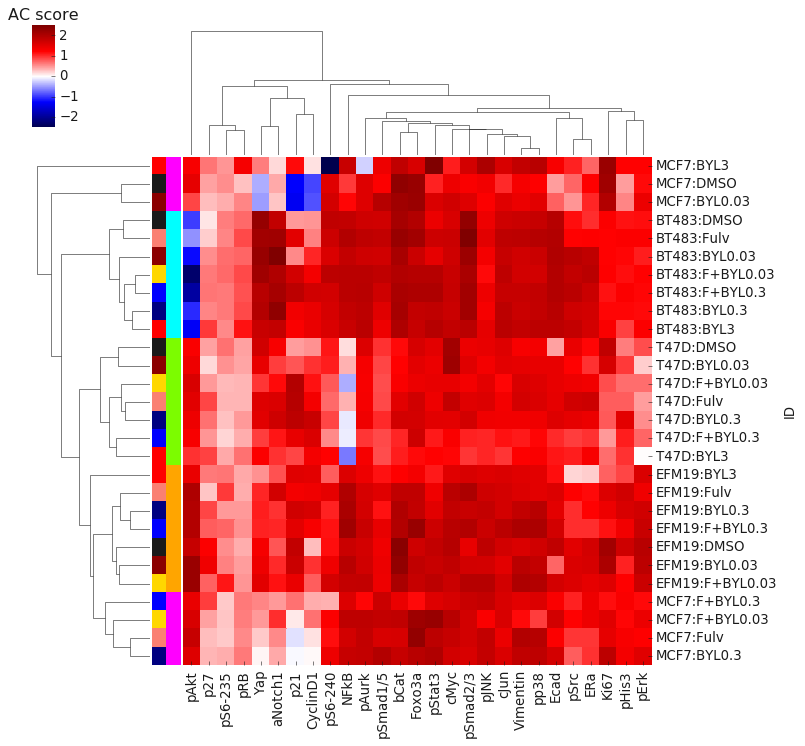

In [49]:
# ACscore heatmap
## range(0,54):AP, range(54:108):AC
## use df3, this does not contain F+BYL3

Cell = dict(zip(df3['CellLine'].unique(), ['cyan', 'magenta', 'lawngreen', 'orange']))
Cell2 = dict(zip(df3['Treatment'].unique(), ['k', 'darkred', 'gold', 'salmon', 'navy', 'blue', 'red', 'snow']))
row_colors = df3['CellLine'].map(Cell)
row_colors2 = df3['Treatment'].map(Cell2)

data = df3.iloc[:,range(54,108,2)]

#range(0,54):Ap, range(54,108):AE
g = sns.clustermap(data, row_colors=[row_colors2, row_colors], cmap="seismic", vmin=-2.5, vmax=2.5) #,row_cluster=False 

plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.title('AC score')

plt.show()

In [50]:
DF = df3.iloc[:,range(54,108,2)]

DF['CellLine'] = df3.loc[:, 'CellLine']
DF['Treatment'] = df3.loc[:, 'Treatment']

DF.columns

C:\Users\sl456\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sl456\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Index(['pAkt', 'pHis3', 'bCat', 'NFkB', 'Ecad', 'pErk', 'pS6-235', 'pRB',
       'Ki67', 'pStat3', 'pS6-240', 'pAurk', 'Foxo3a', 'pSmad1/5', 'pSmad2/3',
       'Vimentin', 'pJNK', 'pp38', 'cMyc', 'p21', 'cJun', 'Yap', 'aNotch1',
       'pSrc', 'p27', 'ERa', 'CyclinD1', 'CellLine', 'Treatment'],
      dtype='object')

In [51]:
from sklearn.preprocessing import StandardScaler
features = ['pAkt', 'pHis3', 'bCat', 'NFkB', 'Ecad', 'pErk', 'pS6-235', 'pRB',
       'Ki67', 'pStat3', 'pS6-240', 'pAurk', 'Foxo3a', 'pSmad1/5', 'pSmad2/3',
       'Vimentin', 'pJNK', 'pp38', 'cMyc', 'p21', 'cJun', 'Yap', 'aNotch1',
       'pSrc', 'p27', 'ERa', 'CyclinD1']

# Separating out the features
x = DF.loc[:, features].values

# Separating out the target
y = DF.loc[:,['CellLine']].values

# Standardizing the features
#x = StandardScaler().fit_transform(x)
x = x

In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 
                          'principal component 3', 'principal component 4', 
                          'principal component 5', 'principal component 6', 
                          'principal component 7', 'principal component 8', 
                          'principal component 9', 'principal components 10' ])

principalDf.index = DF.index

finalDf = pd.concat([principalDf, DF[['CellLine']]], axis = 1)

eigenvalues = pca.explained_variance_

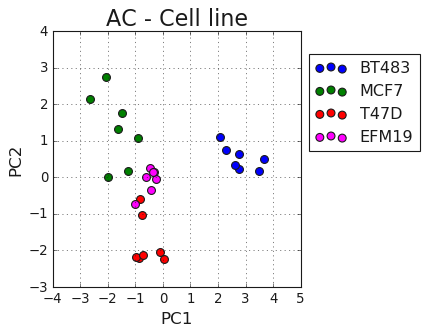

In [53]:
fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot(1,1,1) 

targets = ['BT483', 'MCF7', 'T47D', 'EFM19']
colors = ['blue', 'green', 'red', 'magenta']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['CellLine'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets, loc='lower left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('AC - Cell line', fontsize = 20)
ax.grid()

plt.show()

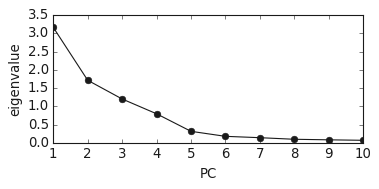

In [54]:
# eigenvalue
fig = plt.figure(figsize = (5,2))
ax = fig.add_subplot(1,1,1) 

ax.plot(range(1,11), eigenvalues, marker='o', c='k')

plt.ylabel('eigenvalue')
plt.xlabel('PC')
plt.ylim([0, 3.5])
#plt.xlim([])

plt.show()

# APscore - by Treatment

In [25]:
DF = df3.iloc[:,range(0,54,2)]

DF['CellLine'] = df3.loc[:, 'CellLine']
DF['Treatment'] = df3.loc[:, 'Treatment']

DF.columns

C:\Users\sl456\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sl456\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Index(['pAkt', 'pHis3', 'bCat', 'NFkB', 'Ecad', 'pErk', 'pS6-235', 'pRB',
       'Ki67', 'pStat3', 'pS6-240', 'pAurk', 'Foxo3a', 'pSmad1/5', 'pSmad2/3',
       'Vimentin', 'pJNK', 'pp38', 'cMyc', 'p21', 'cJun', 'Yap', 'aNotch1',
       'pSrc', 'p27', 'ERa', 'CyclinD1', 'CellLine', 'Treatment'],
      dtype='object')

In [26]:
from sklearn.preprocessing import StandardScaler
features = ['pAkt', 'pHis3', 'bCat', 'NFkB', 'Ecad', 'pErk', 'pS6-235', 'pRB',
       'Ki67', 'pStat3', 'pS6-240', 'pAurk', 'Foxo3a', 'pSmad1/5', 'pSmad2/3',
       'Vimentin', 'pJNK', 'pp38', 'cMyc', 'p21', 'cJun', 'Yap', 'aNotch1',
       'pSrc', 'p27', 'ERa', 'CyclinD1']

# Separating out the features
x = DF.loc[:, features].values

# Separating out the target
y = DF.loc[:,['Treatment']].values

# Standardizing the features
#x = StandardScaler().fit_transform(x)
x = x

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 
                          'principal component 3', 'principal component 4', 
                          'principal component 5', 'principal component 6', 
                          'principal component 7', 'principal component 8', 
                          'principal component 9', 'principal components 10' ])

principalDf.index = DF.index

finalDf = pd.concat([principalDf, DF[['Treatment']]], axis = 1)

In [28]:
finalDf['Treatment'].unique()

array(['DMSO', 'BYL0.03', 'F+BYL0.03', 'Fulv', 'BYL0.3', 'F+BYL0.3', 'BYL3'], dtype=object)

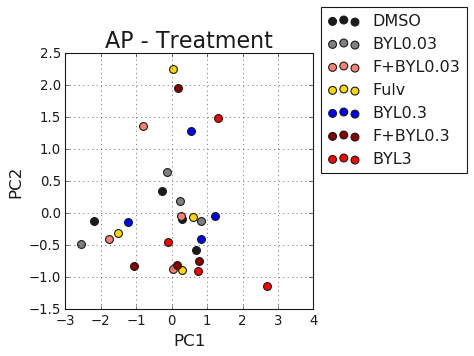

In [29]:
fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot(1,1,1) 

targets = ['DMSO', 'BYL0.03', 'F+BYL0.03', 'Fulv', 'BYL0.3', 'F+BYL0.3', 'BYL3']
colors = ['k', 'gray', 'salmon', 'gold', 'blue', 'darkred', 'red']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Treatment'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets, loc='lower left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('AP - Treatment', fontsize = 20)
ax.grid()

plt.show()

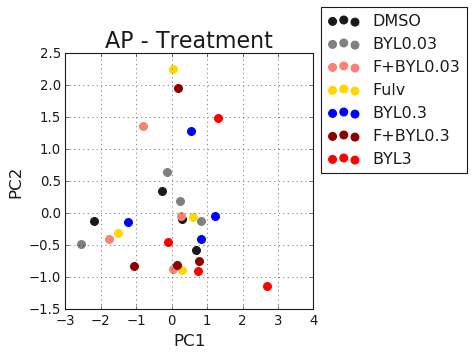

In [30]:
# fig = plt.figure(figsize = (4,4))
# ax = fig.add_subplot(1,1,1) 

# targets = ['DMSO', 'BYL0.03', 'F+BYL0.03', 'Fulv', 'BYL0.3', 'F+BYL0.3', 'BYL3']
# colors = ['k', 'gray', 'salmon', 'gold', 'blue', 'darkred', 'red']
# for target, color in zip(targets,colors):
#     indicesToKeep = finalDf['Treatment'] == target
#     ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
#                , finalDf.loc[indicesToKeep, 'principal component 2']
#                , c = color
#                , s = 50
#                , edgecolors='face')
# ax.legend(targets, loc='lower left', bbox_to_anchor=(1, 0.5))
# ax.set_xlabel('PC1', fontsize = 15)
# ax.set_ylabel('PC2', fontsize = 15)
# ax.set_title('AP - Treatment', fontsize = 20)
# ax.grid()

# plt.show()

# ACscore - by Treatment

In [119]:
DF = df3.iloc[:,range(54,108,2)]

DF['CellLine'] = df3.loc[:, 'CellLine']
DF['Treatment'] = df3.loc[:, 'Treatment']

DF.columns

C:\Users\sl456\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sl456\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Index(['pAkt', 'pHis3', 'bCat', 'NFkB', 'Ecad', 'pErk', 'pS6-235', 'pRB',
       'Ki67', 'pStat3', 'pS6-240', 'pAurk', 'Foxo3a', 'pSmad1/5', 'pSmad2/3',
       'Vimentin', 'pJNK', 'pp38', 'cMyc', 'p21', 'cJun', 'Yap', 'aNotch1',
       'pSrc', 'p27', 'ERa', 'CyclinD1', 'CellLine', 'Treatment'],
      dtype='object')

In [120]:
from sklearn.preprocessing import StandardScaler
features = ['pAkt', 'pHis3', 'bCat', 'NFkB', 'Ecad', 'pErk', 'pS6-235', 'pRB',
       'Ki67', 'pStat3', 'pS6-240', 'pAurk', 'Foxo3a', 'pSmad1/5', 'pSmad2/3',
       'Vimentin', 'pJNK', 'pp38', 'cMyc', 'p21', 'cJun', 'Yap', 'aNotch1',
       'pSrc', 'p27', 'ERa', 'CyclinD1']

# Separating out the features
x = DF.loc[:, features].values

# Separating out the target
y = DF.loc[:,['Treatment']].values

# Standardizing the features
#x = StandardScaler().fit_transform(x)
x = x

In [121]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

principalDf.index = DF.index

finalDf = pd.concat([principalDf, DF[['Treatment']]], axis = 1)

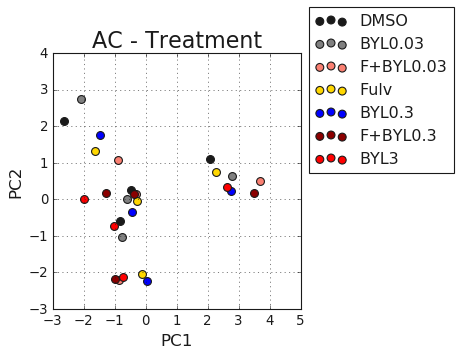

In [124]:
fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot(1,1,1) 

targets = ['DMSO', 'BYL0.03', 'F+BYL0.03', 'Fulv', 'BYL0.3', 'F+BYL0.3', 'BYL3']
colors = ['k', 'gray', 'salmon', 'gold', 'blue', 'darkred', 'red']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Treatment'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets, loc='lower left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('AC - Treatment', fontsize = 20)
ax.grid()

plt.show()